In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

----
Load and prepare the `MNIST dataset`. Convert the samples from integers to floating-point numbers

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

print(x_train.shape)

(60000, 28, 28)


-----
Our train dataset consist of 60000 images of same dimensions $28\times 28$. Each with class label 

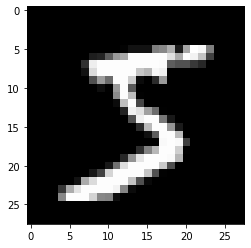

Class Labe : 5


In [4]:
plt.imshow(x_train[0],'gray')
plt.show()

print("Class Labe : {}".format(y_train[0]))

----
Build the `tf.keras.Sequential` model by stacking layers. 

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

----
For each example the model returns a vector of 'logits' or 'log-odds' scores, one for each class

In [6]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.3455719 , -0.2696538 , -0.5184972 , -0.7129755 , -0.51851094,
         0.35251012,  0.77776027, -0.18160279,  1.1217864 ,  0.16654459]],
      dtype=float32)

----
The `tf.nn.softmax` function converst these logits to 'probabilities' for each class:

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.05979599, 0.06451235, 0.05030041, 0.04141052, 0.05029972,
        0.1201836 , 0.18387769, 0.07045031, 0.2593807 , 0.09978871]],
      dtype=float32)

---
The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

----
This loss is equal to the negative log probability of the true class: it is zeros if the model is sure of the correct class.  

Thus untrained model gives probabilities close to random (1/10 for each class),
so the initial loss should be close to `-tf.log(1/10) $\approx 2.3$`

In [9]:
loss_fn(y_train[:1], predictions).numpy()

2.1187348

In [11]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

---
The `Model.fit` method adjust the model parameters to minimize the loss:

In [12]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2922 - accuracy: 0.9147
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1422 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1075 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0878 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0744 - accuracy: 0.9764


----
The `Model.evaluate` method checks the models perfomance, usually on a 'Validation-set' or 'Test-test'

In [13]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0711 - accuracy: 0.9791


[0.0711418092250824, 0.9790999889373779]

----
The image classifier is now trained to ~97% accuracy on this dataset